In [114]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
#Reading the dataset
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1. Data Assessment

In [116]:
# Check the number of rows and columns in the dataframe
df.shape

(730, 16)

In [117]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [118]:
# Check the summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [119]:
#visualize missing values if any
import klib
klib.missingval_plot(df)

ModuleNotFoundError: No module named 'klib'

In [120]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [121]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Data Cleaning and Analysis

In [122]:
#Changing the season, weathersit, mnth, weekday columns from numerical values to categorical strings
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit=df.weathersit.map({1:'Best', 2:'Neutral', 3:'Bad', 4:'Worse'})
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600



##### Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [123]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(730, 15)

In [124]:
#Inserting a new variable day in the dataframe.
df.insert(4,'day','')
df['day']=pd.DatetimeIndex(df['dteday']).day
df.head()

,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,1,0,Sat,0,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,1,0,Sun,0,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,1,0,Mon,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,1,0,Tue,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,1,0,Wed,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
print('------------------day values------------------')
print(df.day.value_counts())
print('--------------workingday values---------------')
print(df.workingday.value_counts())
print('----------------weekday values----------------')
print(df.weekday.value_counts())

------------------day values------------------
1     24
26    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
2     24
28    24
13    24
27    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
12    24
29    22
30    22
31    14
Name: day, dtype: int64
--------------workingday values---------------
1    499
0    231
Name: workingday, dtype: int64
----------------weekday values----------------
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64


In [126]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(730, 15)

#### Visualization

#### 2.1 Univariate Analysis

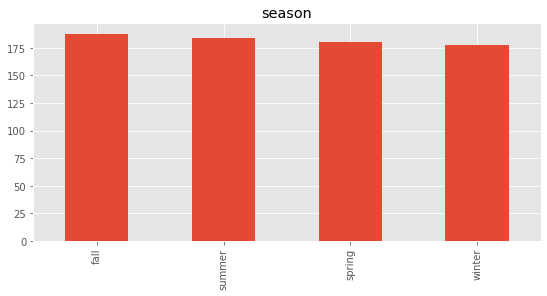

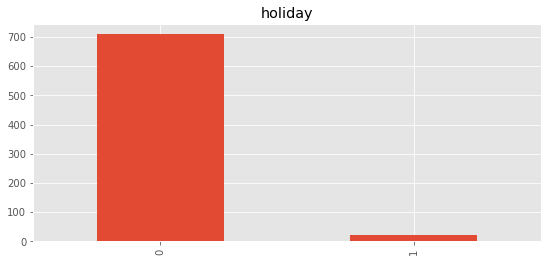

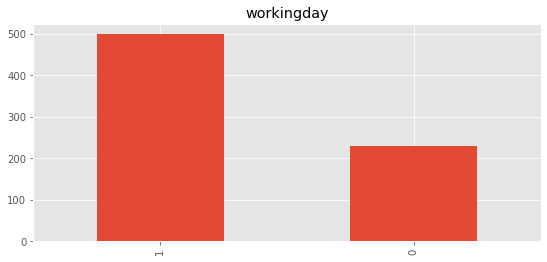

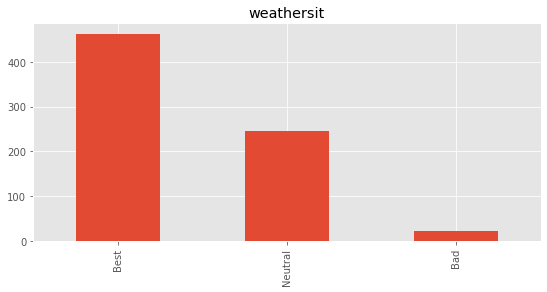

In [127]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [128]:
print('Number of holidays in 2018: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2019: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2018:  10
Number of holidays in 2019:  11


In [129]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

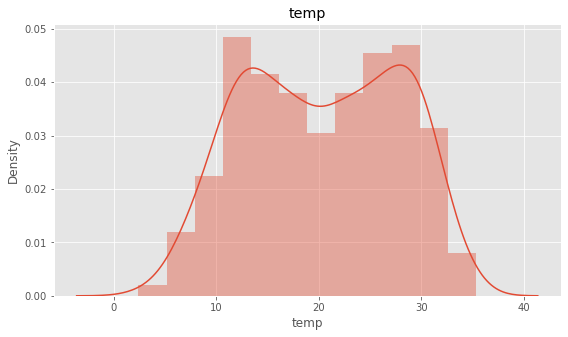

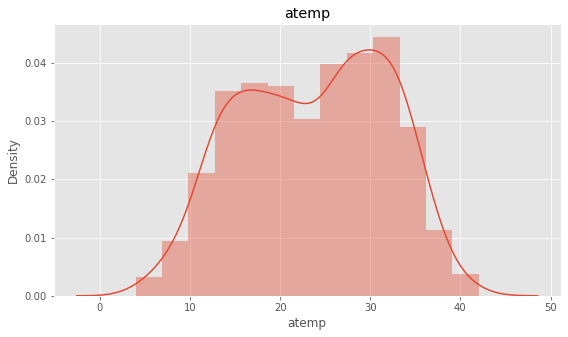

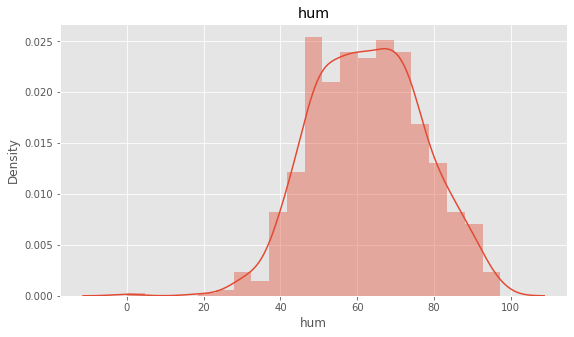

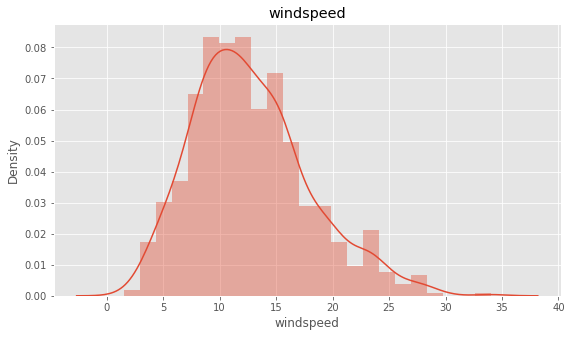

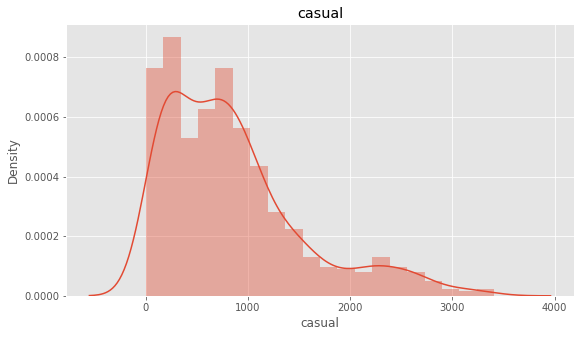

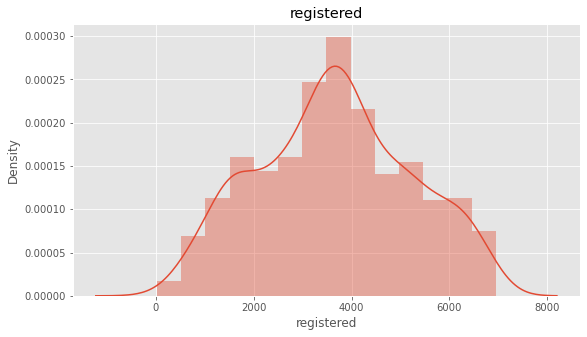

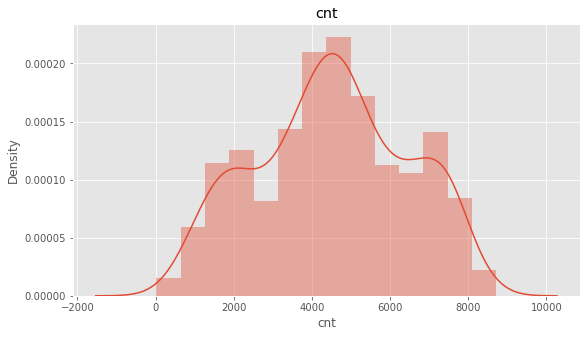

In [130]:
for column in univariate_continuous_var:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

#### Inferences:
1. Values of temperature and feeling temperature are differently distributed.
2. Humidity is almost randomly distributed with a mean of around 61-63.
3. The KDE of windspeed is almost a normal distribution with a right skew because of a few days with windspeed over 30.
4. The spread of casual users is not normally distributed where as that of registered users is normally distributed ultimately leading to cnt to be spread normally distributed.

#### 2.2 Bivariate Analysis

In [131]:
df_continuous=df[univariate_continuous_var]

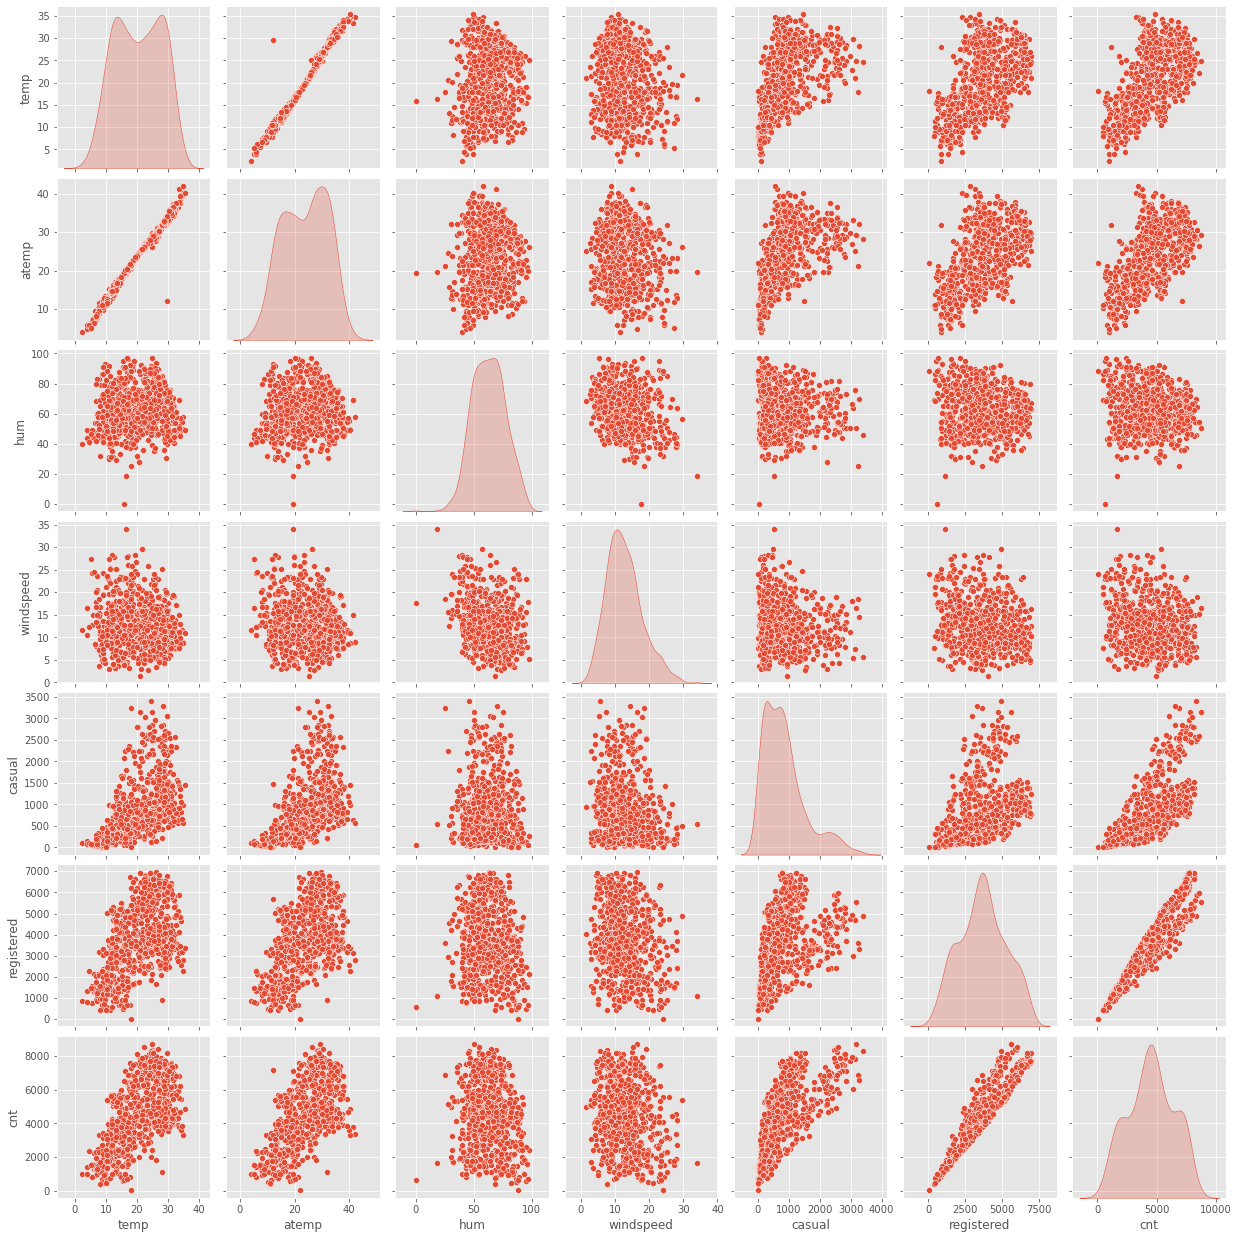

In [132]:
#Bivariate analysis of continuos variables with cnt
sns.pairplot(df_continuous,diag_kind='kde')
plt.show()

#### Observation
1. Huge corelation between temp and atemp. Hence only one of the 2 variables will be in the model.
2. temp/atemp shows some linear relationship with cnt.


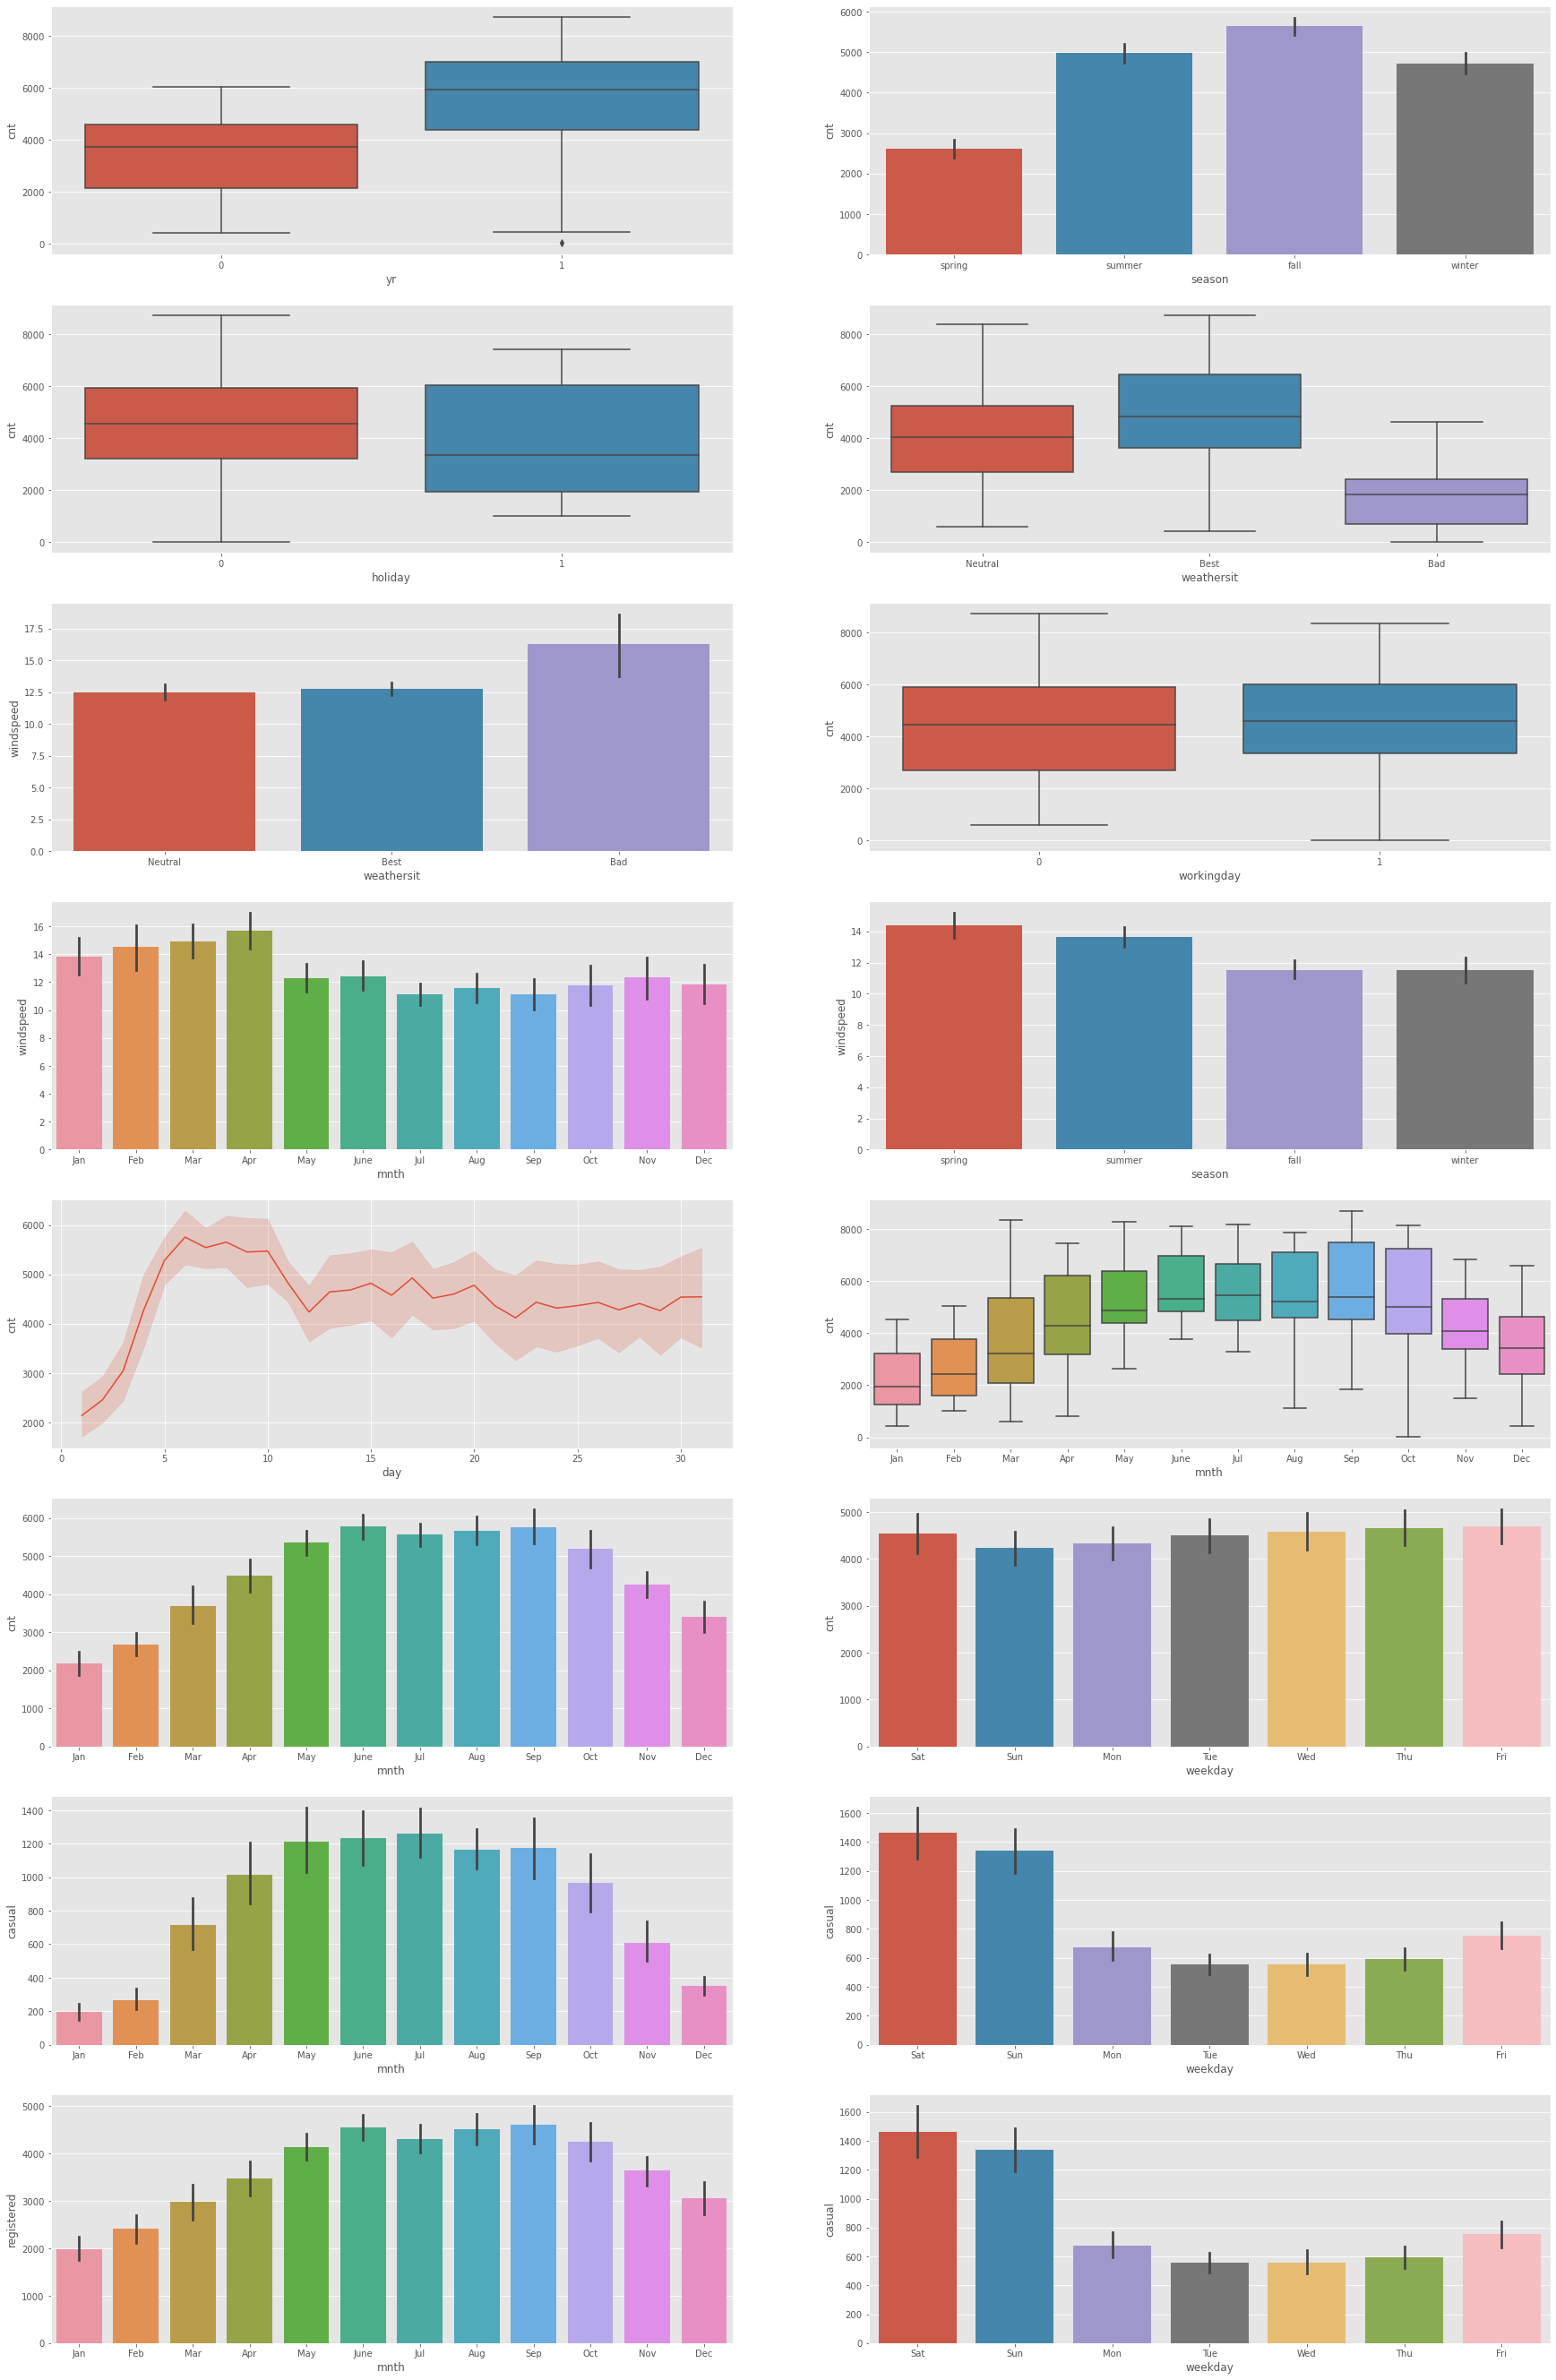

In [133]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,9)
sns.lineplot(x='day', y='cnt', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()

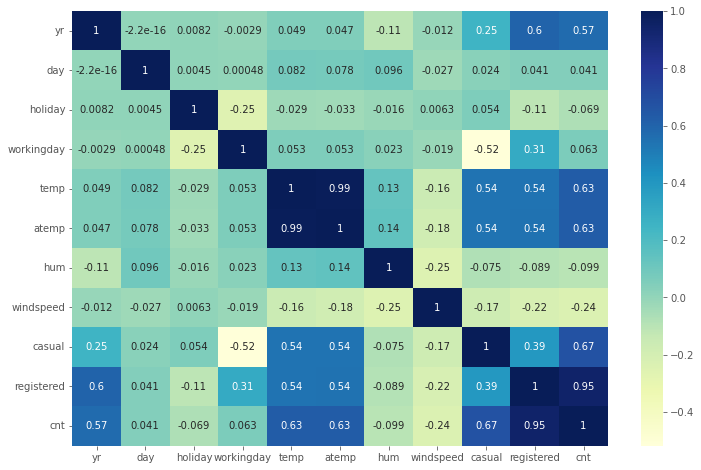

In [135]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [136]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,1,0,Sat,0,Neutral,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,1,0,Sun,0,Neutral,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,1,0,Mon,1,Best,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,1,0,Tue,1,Best,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,1,0,Wed,1,Best,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
df=df.drop('atemp',axis=1)

In [138]:
df.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,1,0,Sat,0,Neutral,14.110847,80.5833,10.749882,985
1,spring,0,Jan,1,0,Sun,0,Neutral,14.902598,69.6087,16.652113,801
2,spring,0,Jan,1,0,Mon,1,Best,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,1,0,Tue,1,Best,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,1,0,Wed,1,Best,9.305237,43.6957,12.522300,1600


### 3. modelling

In [139]:
#Creating Dummy variables

def dummies(x,dataframe):
    temp = pd.get_dummies(dataframe[x], drop_first = True)
    dataframe = pd.concat([dataframe, temp], axis = 1)
    dataframe.drop([x], axis = 1, inplace = True)
    return dataframe
# Applying the function to the bikeSharing

df = dummies('season',df)
df = dummies('mnth',df)
df = dummies('weekday',df)
df = dummies('weathersit',df)
df.head()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
0,0,1,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [140]:
df.shape

(730, 30)

In [141]:
df.describe()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,15.720548,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.634247,0.336986
std,0.500343,8.802278,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.481971,0.473004
min,0.000000,1.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,16.000000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.1 Spliting the data into test and train

In [142]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(df,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### 3.2 Rescalling the features:

In [143]:
#Rescaling even the target variables since a target variable with a large spread of values, in turn, may result 
#in large error gradient values causing weight values to change dramatically, making the learning process unstable.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

need_rescale=['temp','hum','windspeed','cnt']
df_train[need_rescale]=scaler.fit_transform(df_train[need_rescale])

df_train.describe()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,15.631373,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,8.852724,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,16.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.3 Splitting train dataset into X and y

In [144]:
y_train=df_train.pop('cnt')
X_train=df_train

### 4. Model Building

In [145]:
#Since the total number of variables are 30, using RFE to calculate the best 15 variables to be used for model building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm, 15)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('day', False, 15),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Best', True, 1),
 ('Neutral', True, 1)]

In [146]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Best', 'Neutral'],
      dtype='object')

In [147]:
X_train.columns[~rfe.support_]

Index(['day', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [148]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Best,Neutral
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


#### using statsmodel to build an optimized model.

In [149]:
#Defining 2 functions model and VIF to train model and calculate VIF repeatatively.
import statsmodels.api as sm

def model(X,y):
    X=sm.add_constant(X)
    lm_model=sm.OLS(y,X).fit()
    print(lm_model.summary())
    return X

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

#### First Model:

In [150]:
#Training the first model
X_train1=model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          4.22e-191
Time:                        02:20:21   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

In [151]:
#Calculating Variance Inflation Factor
VIF(X_train1)

,Features,VIF
0,const,151.34
14,Best,10.28
15,Neutral,8.89
7,spring,5.08
4,temp,3.89
9,winter,3.59
8,summer,2.65
5,hum,1.91
3,workingday,1.88
13,Sat,1.78


#### Second Model:

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
VIF(X_train1)

In [ ]:
#R squared remained almost the same. Variable Nov seems insignificant

In [ ]:
X_train1=X_train1.drop('Nov',axis=1)

#### Third model

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
VIF(X_train1)

In [ ]:
#R squared remained almost the same. Variable Jan seems insignificant

In [ ]:
X_train1=X_train1.drop('Jan',axis=1)

#### Fourth Model

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
VIF(X_train1)

In [ ]:
#All the variables seems significant now after evaluating P>|t| and VIF

#R squared from model summary is 0.842
r2=0.842

#Calculating adjusted R squared:
n = X_train1.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train1.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

In [ ]:
X_train1=X_train1.drop('Best',axis=1)

#### Fifth Model

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
#The value of R squared decreased and value of F-statistic dropped significantly which shows that the fourth model was more


In [ ]:
VIF(X_train1)

In [ ]:
X_train1=X_train1.drop('spring',axis=1)

#### Sixth Model

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
VIF(X_train1)

In [ ]:
X_train1=X_train1.drop('Neutral',axis=1)

#### Seventh Model

In [ ]:
X_train1=model(X_train1,y_train)

In [ ]:
VIF(X_train1)

This model again has lesser R squared than the fourth model but the F-statistic is much more than that.

#### There are 2 models that can be considered as the best fits:
#### Fourth model and the Seventh model

### 5.  Analysis

In [ ]:
#Rebuilding the seventh model
lm_model7=sm.OLS(y_train,X_train1).fit()
y_train_pred7=lm_model7.predict(X_train1)

In [ ]:
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_pred7), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
#Rebuilding the fourth model
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

In [ ]:
X_train_rfe.drop(['Dec','Nov','Jan'], axis=1, inplace=True)
X_train_rfe.head()

Columns of X_train_rfe are similar to the fourth model

In [153]:
lm_model4=sm.OLS(y_train,X_train_rfe).fit()
y_train_pred4=lm_model4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

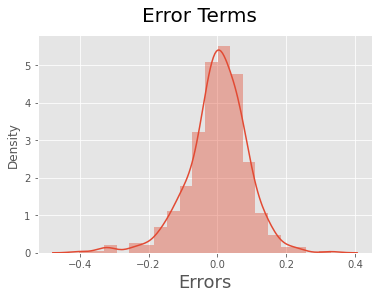

In [154]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### 6.  Predictions

#### 6.1 Preparing data 

In [155]:
df_test.head()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
184,0,7,1,0,29.793347,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,20,0,1,32.082500,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,27,0,1,19.270000,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,8,0,1,31.433347,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,6,0,1,29.315000,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,1,0


In [156]:
#rescaling columns from the list need_rescale=['temp','hum','windspeed','cnt']

df_test[need_rescale]=scaler.transform(df_test[need_rescale])

df_train.head()

,yr,day,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
576,1,31,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,3,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,30,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,28,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,22,0,1,0.345824,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
df_test.describe()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,15.927273,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,8.700715,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,1.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.500000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,24.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Lower values of MAE, MSE and RMSE shows vouches for the good performance of the model.

In [166]:
print(lm_model4.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1325.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):                        0.00
Time:                        02:20:43   Log-Likelihood:                          519.64
No. Observations:                 510   AIC:                                     -1009.
Df Residuals:                     495   BIC:                                     -945.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------